In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import csv
from scipy.stats.stats import pearsonr
from scipy import stats
%matplotlib inline

[Bay Area Bike Share](http://www.bayareabikeshare.com/) is a company that provides on-demand bike rentals for customers in several California cities.  Users can unlock bikes from a variety of stations, and return them to any station within the same city.  Users can make an unlimited number of trips, with trips under 30 minutes in length having no additional charge; longer trips will have overtime fees.

After removing N/A records this dataset contains 25,293 individual trips.

In [3]:
file = "C:/Users/Carter Carlson/Documents/Thinkful/Projects/Data science fundamentals/Capstone Analytic Report and Research Proposal/trip.csv"
df = pd.read_csv(file)
df = df.dropna()

In [4]:
print(df['Trip ID'].count())

25293


###  Sample of Dataset

In [5]:
display(df.head())

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


I began by converting duration into minutes and removing outliers.  To remove outliers, I removed any values outside of two standard deviations of the mean.

In [6]:
df['Duration'] /= 60

variation = np.std(df['Duration'])
mean = df['Duration'].mean()
df1 = df[(df.Duration > mean - 2*variation) &
         (df.Duration < mean + 2*variation)]

## What is the average time for a bike ride?

Bike renters are motivated to rent a bike for 30 minutes or less, because there are additional fees for renting a bike for longer than 30 minutes.  The average bike ride clocked in at 17 minutes, and the majority of bike rides were under 30 minutes, so we can conclude that the additional fees had an impact on trip duration.

In [7]:
print (str(round(df1['Duration'].mean(),1)) + " minutes")

16.8 minutes


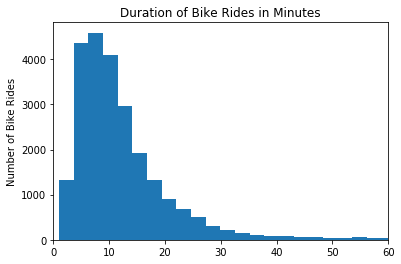

In [ ]:
graph = df1['Duration']
graph = graph.plot(kind='hist', bins=100, xlim=(0, 60))

graph.set_title("Duration of Bike Rides in Minutes")
graph.set_ylabel("Number of Bike Rides")
plt.show()

## Were bikes rented more for daily commutes or weekend activities?

In [ ]:
for row in df1['Start Date']:
    trip_date = datetime.strptime(row, '%m/%d/%Y %H:%M')
    df1.loc[row, 'Hour'] = trip_date.strftime('%H')
    df1.loc[row, 'Weekday'] = trip_date.isoweekday()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The graph below shows that the least popular days to use a bike were Saturday and Sunday, which means more people use the bikes as a daily form of transportation to and from work.

In [ ]:
rides_by_day = df1.groupby('Weekday')['Weekday'].count()
graph = rides_by_day.iloc[:].plot(kind='bar')
graph.set_title("Rides by day: Monday to Sunday")
plt.show()

Not surprisingly, bikes were rented the least between midnight and 5 am.  There were significantly more bikes rented at 8 to 9 am, noon to 1 pm, and 4 to 6 pm.  These three groups of high bike usage show that bikes were used primarily for traveling to work and lunch.  It also explains why there were less bikes riden on the weekends.

In [ ]:
rides_by_hour = df1.groupby('Hour')['Hour'].count()
graph = rides_by_hour.plot(kind='bar')
graph.set_title("Rides by Hour of Day")
graph.set_ylabel("Number of Rides")
plt.show()

People that ride bikes on the weekend are probably only customers, since they are using the bike recreationally and don't need a subscription for a weekend ride.  Comparably, riders that use a bike during the week to commute will probably be subscribers because they rent a bike frequently enough to justify the subscription.

##  Are the Durations for Subscribers and Customers significantly different?

### $H_1$: the average duration for subscribers will be different than the average duration for customers.
### $H_0$: the average duration for subscribers is not different than the average duration for customers.

How large is each group?

In [ ]:
print('Subscribers:', len(df1[df1['Subscription Type'] == "Subscriber"]))
print('Customers:', len(df1[df1['Subscription Type'] == "Customer"]))

What is the average duration for each group?

In [ ]:
print('Subscriber Duration mean:', df1[df1['Subscription Type'] == 'Subscriber'].Duration.mean())
print('Customer Duration mean:', df1[df1['Subscription Type'] == 'Customer'].Duration.mean())

Are the duration times significantly different?

In [ ]:
stats.ttest_ind(df1[df1['Subscription Type'] == 'Subscriber'].Duration,
                df1[df1['Subscription Type'] == 'Customer'].Duration)

#### Conclusion: The p-value is low enough to reject the null hypothesis.  Therefore, the average duration for subscribers IS different than the average duration for customers.

If you think of a new customer that rents a bike only once, there's a chance that they are not aware of the additional fees for a ride over 30 minutes.  Subscribers, on the other hand, rent these bikes daily and are probably aware of the additional fees.

## Limitations
---
There are several factors not included that may change the overall impact of the study:
1. The sample we used might show different results than the population.
2. The top three zipcodes for bike rentals are all in San Francisco so this analysis is biased towards the rides in SF.

In [ ]:
zipcodes = df1.groupby('Zip Code')['Zip Code'].count().sort_values()
print("Top 3 Zipcodes")
zipcodes.iloc[len(zipcodes)-3:]

2. Is the information recorded is 100% accurate?